In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))

In [3]:
X.shape

(100, 2)

In [4]:
X[:, 0] = np.random.uniform(0, 100, size=100)

In [8]:
X[:, 1] = 0.75*X[:, 0] + 3.0 + np.random.normal(0, 10, size=100)

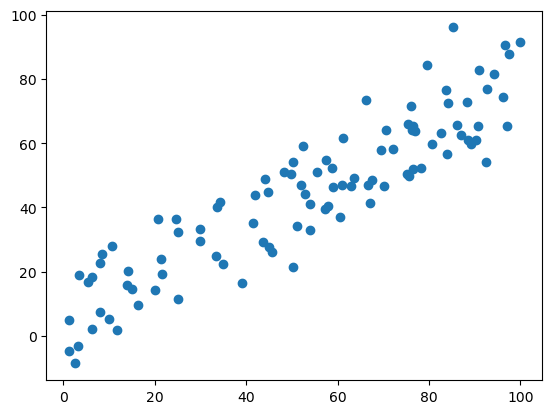

In [9]:
plt.scatter(X[:, 0], X[:, 1])

In [19]:
def demean(X):
    return X - np.mean(X, axis = 0)

In [11]:
axtest = np.arange(24).reshape(2, 3, 4)

# demean


In [20]:
np.mean(X, axis=0)

array([53.10470088, 44.28507108])

In [26]:
X_demean = demean(X)

In [27]:
X_demean

array([[  7.49750589,  -7.277353  ],
       [ 23.18403958,  19.70009195],
       [ -4.83902858,   6.82853848],
       [-18.07038223, -21.83728506],
       [ 14.53136141,   4.30156169],
       [ 46.76302822,  47.11213457],
       [ 39.42797212,   9.88526102],
       [ 25.13894677,   7.83491057],
       [  7.85501641,   2.73303716],
       [  2.41928615,   6.7891107 ],
       [-42.37723573, -16.30537947],
       [-41.43761792, -42.42243926],
       [ 44.36335637,  43.34391361],
       [-23.21556917, -14.8019192 ],
       [-49.77661322, -25.31124538],
       [-33.0529927 , -29.89031289],
       [ -7.37651466, -18.20410274],
       [ 43.17906291,  30.20788522],
       [ 23.75590801,  19.33392169],
       [-11.56156649,  -9.10683234],
       [ -2.87317232, -22.77183144],
       [-28.00946997, -32.69279179],
       [ 23.43350177,   7.52662476],
       [ 22.48293325,   5.56948686],
       [-39.10589946, -28.38539329],
       [-51.88737904, -39.20219864],
       [ -1.9949067 ,  -9.94284162],
 

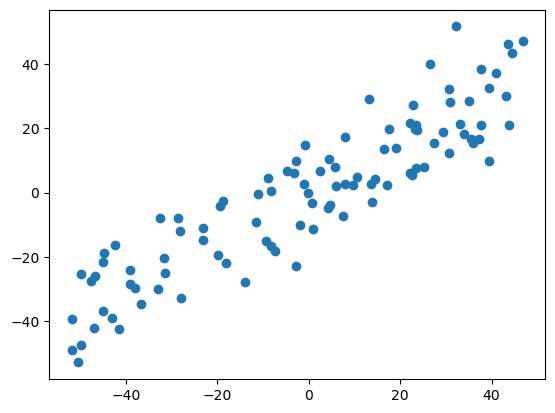

In [115]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

In [116]:
np.mean(X_demean[:, 0])


-3.350208999108872e-14

In [30]:
np.mean(X_demean[:, 1])

-6.572520305780927e-15

# 梯度上升发

In [33]:
def f(X, w):
    return np.sum(X.dot(w)**2)/len(X)

In [92]:
def df_math(X, w):
    return X.T.dot(X.dot(w))*2/len(X)

In [62]:
def df_debug(X, w, epsilon=0.0001): # w是一个方向向量，模为1，每个维度的值都很小, 所以epsilon的值也小
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_2 = w.copy()
        w_1[i] += epsilon
        w_2[i] -= epsilon
        res[i] = (f(X, w_1) - f(X, w_2)) /(2*epsilon)
    return res

In [72]:
def direction(w): #求单位向量
    return w / np.linalg.norm(w)

In [82]:
 def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
     w = direction(initial_w)
     i_iter = 0

     while (i_iter < n_iters):
         last_w = w
         gradient = df(X, w)
         w = w + eta*gradient
         w = direction(w)
         if np.abs(f(X, w) - f(X, last_w)) < epsilon:
             break
         i_iter += 1
     return w

In [83]:
X_b = np.hstack((np.ones((len(X_demean), 1)), X_demean))
initial_w = np.zeros(X_b.shape[1])

In [84]:
X_b.shape


(100, 3)

In [85]:
initial_w = np.random.random(X.shape[1])

In [86]:
initial_w

array([0.0508938 , 0.13110877])

In [87]:
ww = initial_w /np.linalg.norm(initial_w)

In [88]:
ww

array([0.36187214, 0.93222774])

In [89]:
eta = 0.001

In [90]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7845595 , 0.62005354])

In [95]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

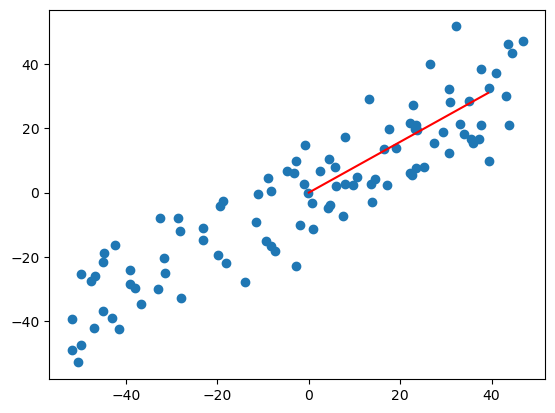

In [101]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot((0, w[0] * 50), (0, w[1]*50), color='r')

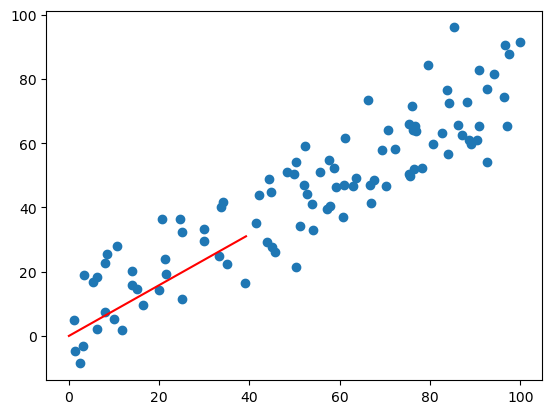

In [103]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, w[0] * 50], [0, w[1]*50], color='r')

In [104]:
w

array([0.7845595 , 0.62005354])

In [107]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0, 100, size=100)
X2[:, 1] = 0.75*X2[:, 0] + 3.0 

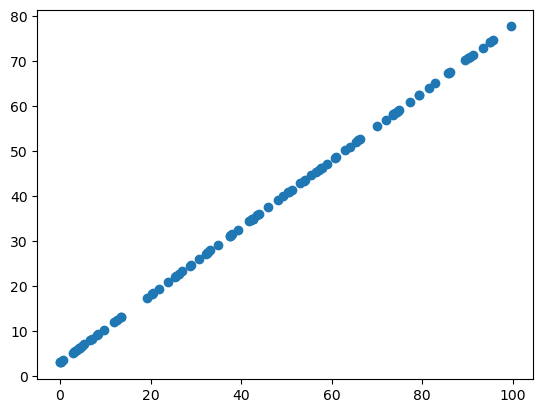

In [108]:
plt.scatter(X2[:, 0], X2[:, 1])

In [109]:
X2_demean = demean(X2)

In [110]:
initial_w2 = np.random.random(X2.shape[1])

In [111]:
initial_w2

array([0.91660884, 0.73134445])

In [112]:
w2 = gradient_ascent(df_math, X2_demean, initial_w2, eta)

In [113]:
w2

array([0.7999998 , 0.60000027])

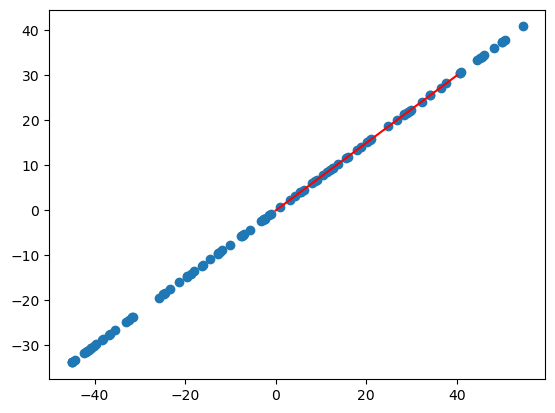

In [114]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 50], [0, w2[1]*50], color='r')